In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
sql = """SELECT substr(datetime,0,11) as date,
                count(datetime)
           FROM pageviews
          WHERE uid LIKE 'user_%'
       GROUP BY substr(datetime,0,11);"""
pageviews = pd.read_sql(sql, conn, parse_dates=['datetime'])
pageviews = pageviews.set_index('date')
pageviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   count(datetime)  33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


<Axes: title={'center': 'Views per Day'}, xlabel='Date', ylabel='Views'>

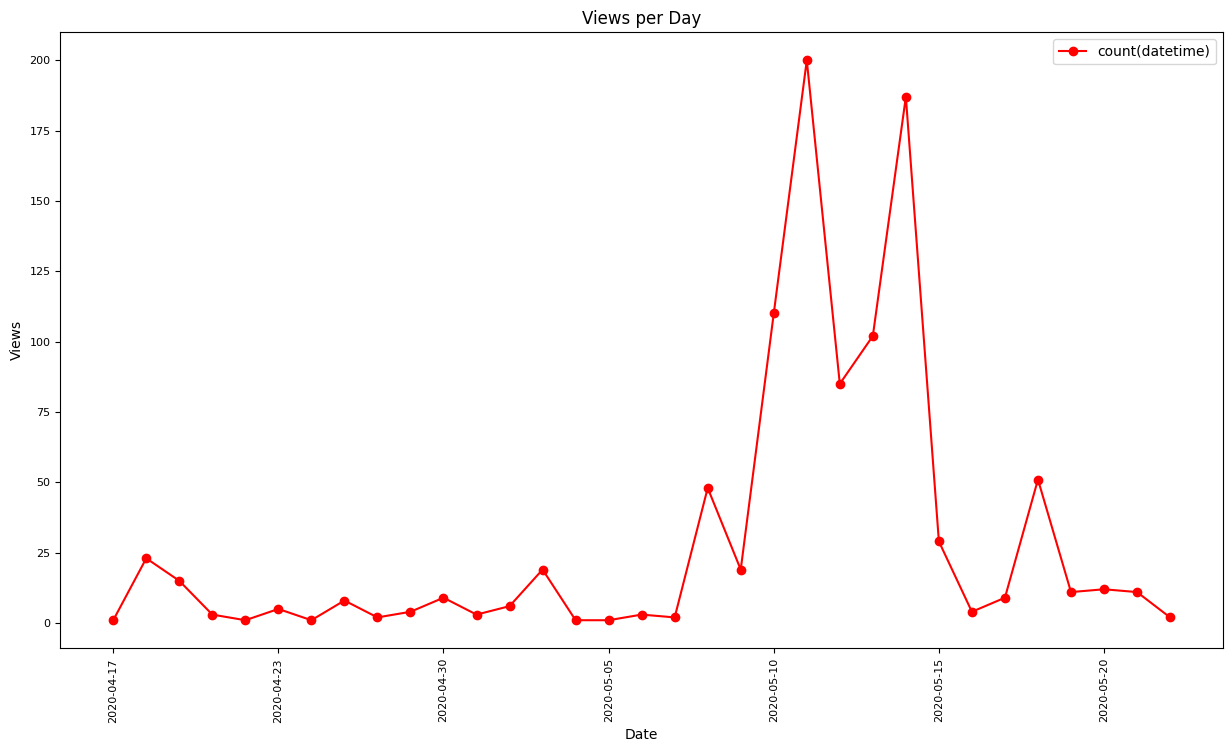

In [4]:
pageviews.plot(
    kind='line',
    figsize=(15, 8),
    fontsize = 8,
    title='Views per Day',
    xlabel='Date',
    ylabel='Views',
    grid=False,
    color='red',
    marker='o',
    rot = 90
)

In [5]:
conn.close()